<a href="https://colab.research.google.com/github/KathituCodes/Churn-predictions/blob/main/Phase_2_Building_the_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***BUILDING THE CHURN PREDICTION MODEL***

### What is Churn?

**Churn**, also known as **customer attrition**, refers to the **rate at which customers stop doing business with a company** over a given period. A customer is considered "churned" when they **cancel a subscription, stop purchasing, or fail to renew a service**.

---

### What is Churn Used For in Business?

Understanding and measuring churn is **critical for business sustainability and growth**. Here’s how it's used:

#### 1. **Measuring Customer Retention**

* Churn is the inverse of customer retention. A high churn rate often signals poor customer satisfaction or lack of engagement.
* Example: A telecom company tracks monthly churn to know how many subscribers leave their service.

#### 2. **Predictive Analytics**

* Businesses use historical data to **predict which customers are likely to churn**, allowing for preemptive retention efforts.
* Example: E-commerce platforms send re-engagement offers to users showing signs of churn.

#### 3. **Improving Products or Services**

* Analyzing churn patterns helps identify **pain points** in the customer journey (e.g., pricing, poor service, product dissatisfaction).

#### 4. **Revenue Forecasting**

* Churn affects **lifetime value (LTV)** calculations and revenue projections. Keeping churn low is essential for stable, long-term growth.
* Example: Subscription-based businesses (like Netflix or SaaS platforms) depend on minimizing churn to maximize recurring revenue.

#### 5. **Strategic Decision Making**

* Churn metrics inform decisions on **marketing spend, customer support improvements, onboarding changes**, etc.

---

### Summary

> **Churn** tells you how many customers are walking out the door—and why. Managing it well helps businesses stay profitable, competitive, and customer-centric.




In [1]:
# Importing the necessary liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Reading the csv file
df = pd.read_csv('/content/expresso_cleaned.csv')
df.head(10)

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,FREQ_TOP_PACK,CHURN
0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,54,8.0,0.0
1,NO-REGION,I 18-21 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,1.0
2,NO-REGION,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,0.0,90.0,17,1.0,0.0
3,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,62,11.0,0.0
4,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,0.0,39.0,11,2.0,0.0
5,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,0.0,252.0,62,18.0,0.0
6,LOUGA,K > 24 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0
7,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,55,8.0,0.0
8,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,0.0,2.0,31,0.0,0.0
9,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,0.0,1620.0,45,8.0,0.0


In [3]:
# Check the count of rows and columns in the dataset
df.value_counts()

REGION      TENURE        MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  REGULARITY  FREQ_TOP_PACK  CHURN
ZIGUINCHOR  K > 24 month  67300.0  22.0            31924.0  10641.0       34.0       0.0          21.0    60          33.0           0.0      1
DAKAR       D 3-6 month   0.0      0.0             0.0      0.0           0.0        0.0          0.0     1           0.0            0.0      1
                                                                                     24.0         8.0     3           0.0            0.0      1
                                                                                     30.0         0.0     10          0.0            0.0      1
ZIGUINCHOR  K > 24 month  21000.0  16.0            21998.0  7333.0        28.0       7603.0       0.0     56          3.0            0.0      1
                                                                                                                                             ..
DAKAR       E 6-9 month   2000.0   3.0             1983.0   661.0         3.0        0.0          33.0    11          1.0            0.0      1
            D 3-6 month   14000.0  11.0            14000.0  4667.0        11.0       65.0         224.0   35          14.0           0.0      1
                          10300.0  38.0            10228.0  3409.0        37.0       5111.0       3.0     42          33.0           0.0      1
                          2550.0   9.0             2525.0   842.0         9.0        3219.0       3.0     16          3.0            0.0      1
                          1100.0   2.0             0.0      0.0           0.0        0.0          0.0     4           0.0            0.0      1
Name: count, Length: 46004, dtype: int64

In [5]:
# Check the general distribution of the values in the 'TENURE' column
df['TENURE'].value_counts()

,count
TENURE,
K > 24 month,43690
I 18-21 month,875
H 15-18 month,526
G 12-15 month,328
J 21-24 month,290
F 9-12 month,209
E 6-9 month,60
D 3-6 month,27


In [6]:
# Encode the 'TENURE' and 'REGION' column into numerical values using the Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['TENURE', 'REGION']

# Initializing an empty dictionary to store the LabelEncoders
encoder_dict = {}

# Loop throgh each categorical column
for col in categorical_cols:
      encoder = LabelEncoder()
      df[col] = encoder.fit_transform(df[col])
      encoder_dict[col] = encoder

In [7]:
# Check the distribution of rows the 'TENURE' column
df['TENURE'].value_counts()

,count
TENURE,
7,43690
5,875
4,526
3,328
6,290
2,209
1,60
0,27


In [9]:
# Checking the number of outliers in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(outliers)

REGION               0
TENURE            2315
MONTANT           3005
FREQUENCE_RECH    3133
REVENUE           2969
ARPU_SEGMENT      2968
FREQUENCE         2557
DATA_VOLUME       7967
ON_NET            7017
REGULARITY           0
FREQ_TOP_PACK     4175
CHURN             3090
dtype: int64


In [10]:
# Cap the outliers in a given range
# Using the IQR method to cap the outliers in the 'BALANCE_FREQUENCY' column
def cap_outliers(df, columns, lower_bounds, upper_bounds):
    # Replace outliers with the lower or upper bound
    for column, lower_bound, upper_bound in zip(columns, lower_bounds, upper_bounds):
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Calculate Q1, Q3, and IQR for the specified columns
columns = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'FREQ_TOP_PACK']
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for each column
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

# Apply the cap_outliers function
df = cap_outliers(df, columns, lower_bounds.values, upper_bounds.values)

In [11]:
# Checking the number of outliers in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(outliers)

REGION               0
TENURE            2315
MONTANT              0
FREQUENCE_RECH       0
REVENUE              0
ARPU_SEGMENT         0
FREQUENCE            0
DATA_VOLUME          0
ON_NET               0
REGULARITY           0
FREQ_TOP_PACK        0
CHURN             3090
dtype: int64


In [12]:
# General description of the dataset
df.describe()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,FREQ_TOP_PACK,CHURN
count,46005.000000,46005.000000,46005.000000,46005.000000,46005.000000,46005.000000,46005.00000,46005.000000,46005.000000,46005.000000,46005.000000,46004.000000
mean,5.865406,6.858189,4389.579937,9.389447,4472.664852,1490.914162,12.02428,748.405326,78.755472,36.297620,6.026258,0.067168
std,4.807992,0.684502,4801.589066,10.165314,4907.057024,1635.733244,12.38599,1171.201647,110.161073,20.225427,6.858397,0.250316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,7.000000,500.000000,1.000000,569.000000,190.000000,2.00000,0.000000,1.000000,18.000000,1.000000,0.000000
50%,7.000000,7.000000,2500.000000,5.000000,2500.000000,833.000000,7.00000,0.000000,16.000000,38.000000,3.000000,0.000000
75%,9.000000,7.000000,6650.000000,14.000000,6830.000000,2277.000000,18.00000,1198.000000,120.000000,56.000000,9.000000,0.000000
max,14.000000,7.000000,15875.000000,33.500000,16221.500000,5407.500000,42.00000,2995.000000,298.500000,62.000000,21.000000,1.000000


In [13]:
# Split the dataset into training and testing sets
X = df.drop('CHURN', axis=1)
y = df['CHURN']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Applying SMOTE to the training data
from imblearn.over_sampling import SMOTE

# Drop rows with NaN values in the target variable y
X_train, y_train = X_train[~y_train.isna()], y_train[~y_train.isna()]

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [18]:
# Select the features using the variance threshold method
# Calculate the variance of each feature
'''
If the features are not of the same scale, then the variances will not
be easily comparable. This means that you need to standardize the data
before calculating the variances.
'''
X_train.var(axis=0)

,0
REGION,1.615763e+01
TENURE,6.940929e-01
MONTANT,1.771801e+07
FREQUENCE_RECH,7.765338e+01
REVENUE,1.847637e+07
ARPU_SEGMENT,2.053034e+06
FREQUENCE,1.170576e+02
DATA_VOLUME,1.170976e+06
ON_NET,8.555626e+03
REGULARITY,4.367574e+02


In [19]:
# Scale the features using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Get the variance of the scaled dataframe
X_train_scaled.var(axis=0)

array([0.08243571, 0.01416496, 0.07030419, 0.06919336, 0.07021472,
       0.07020965, 0.06635824, 0.1305413 , 0.09601892, 0.11737464,
       0.07896824])

/tmp/ipython-input-2998129178.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


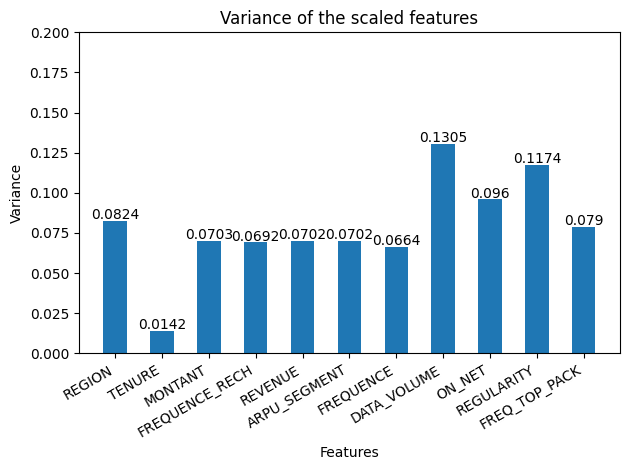

In [21]:
# Plot a bar plot to show the scaled features
import matplotlib.pyplot as plt # Make sure to import matplotlib.pyplot

fig, ax = plt.subplots()

x = X.columns
y = X_train_scaled.var(axis=0)

ax.bar(x, y, width=0.5)

ax.set_title('Variance of the scaled features')
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Corrected loop to unpack both index and value from enumerate
for index, value in enumerate(y):
  plt.text(x=index, y=value+0.001, s=str(round(value, 4)), ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [22]:
# Turn the scaled values from a numpy array to a dataframe
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)
#X_train.head()
#X_test.head()

In [23]:
# Now drop the unrequired columns for model testing. set the threshold for training features to have a variance of 0.1
#sel_X_train = X_train.drop(columns=['TENURE'])
#sel_X_test = X_test.drop(columns=['TENURE'])

In [24]:
# Train the model using logistic regression algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Evaluate the model
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8177662609910906
0.7714378871861755


In [26]:
# Test the model accuracy
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7714378871861755


In [27]:
# Generating the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      8568
         1.0       0.21      0.81      0.33       633

    accuracy                           0.77      9201
   macro avg       0.59      0.79      0.60      9201
weighted avg       0.93      0.77      0.83      9201



# ***Saving the trained model***


In [28]:
import pickle


In [29]:
filename = 'trained_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [30]:
# lLoading the saved file
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [31]:
# Try getting a prediction from your model
loaded_model.predict([[0,0,0,0,0,0,0,0,0,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [42]:
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the encoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(encoder_dict, file)

# ***Streamlit Deployment Locally***

In [43]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 361.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [52]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression

# Set page configuration
st.set_page_config(page_title="Telecom Churn Prediction", page_icon="📡", layout="wide")

# Load model and preprocessors
try:
    with open('logistic_regression_model.pkl', 'rb') as file:
        model = pickle.load(file)
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)
    with open('label_encoder.pkl', 'rb') as file:
        encoder_dict = pickle.load(file)
except FileNotFoundError:
    st.error("Model, scaler, or encoder files not found. Ensure all .pkl files are in the directory.")
    st.stop()

# Custom CSS for better visuals
st.markdown("""
<style>
    .main {background-color: #f5f5f5;}
    .stButton>button {background-color: #0066cc; color: white; border-radius: 8px; padding: 10px 20px;}
    .stButton>button:hover {background-color: #0055aa;}
    .stNumberInput input {border-radius: 5px;}
    .stSelectbox {border-radius: 5px;}
    .sidebar .sidebar-content {background-color: #e6f3ff;}
</style>
""", unsafe_allow_html=True)

# Title and header
st.title("📡 Telecom Customer Churn Prediction")
st.markdown("Enter customer details to predict the likelihood of churn.")

# Input form
with st.form("churn_form"):
    st.subheader("Customer Information")
    col1, col2 = st.columns(2)

    with col1:
        region_options = list(encoder_dict['REGION'].classes_)
        REGION = st.selectbox('Region', region_options, help="Select customer's region")
        region_encoded = encoder_dict['REGION'].transform([REGION])[0]

        tenure_options = list(encoder_dict['TENURE'].classes_)
        TENURE = st.selectbox('Tenure', tenure_options, help="Select customer's tenure")
        tenure_encoded = encoder_dict['TENURE'].transform([TENURE])[0]

        montant = st.number_input('Montant (Amount)', min_value=0.0, step=0.1, format="%.2f", help="Total amount spent")
        frequence_rech = st.number_input('Recharge Frequency', min_value=0.0, step=0.1, format="%.2f", help="Frequency of recharges")
        revenue = st.number_input('Revenue', min_value=0.0, step=0.1, format="%.2f", help="Customer revenue")

    with col2:
        arpu_segment = st.number_input('ARPU Segment', min_value=0.0, step=0.1, format="%.2f", help="Average revenue per user segment")
        frequence = st.number_input('Frequency', min_value=0.0, step=0.1, format="%.2f", help="Usage frequency")
        data_volume = st.number_input('Data Volume', min_value=0.0, step=0.1, format="%.2f", help="Data usage volume")
        on_net = st.number_input('On-Net Calls', min_value=0.0, step=0.1, format="%.2f", help="On-network call volume")
        regularity = st.number_input('Regularity', min_value=1.0, max_value=62.0, step=1.0, format="%.1f", help="Usage regularity (1-62)")
        freq_top_pack = st.number_input('Top Pack Frequency', min_value=0.0, step=0.1, format="%.2f", help="Frequency of top pack usage")

    # Predict button
    submitted = st.form_submit_button("Predict Churn", use_container_width=True)

# Prediction logic
if submitted:
    features = np.array([region_encoded, tenure_encoded, montant, frequence_rech, revenue, arpu_segment,
                         frequence, data_volume, on_net, regularity, freq_top_pack]).reshape(1, -1)
    scaled_features = scaler.transform(features)

    try:
        prediction = model.predict(scaled_features)[0]
        proba = model.predict_proba(scaled_features)[0][1]

        st.subheader("Prediction Result")
        if prediction == 1:
            st.error("Customer is likely to churn.")
        else:
            st.success("Customer is likely to stay.")
        st.metric("Churn Probability", f"{proba:.2%}")
    except Exception as e:
        st.error(f"Prediction error: {e}")

# Sidebar with model information
with st.sidebar:
    st.header("About This Model")
    st.markdown("""
    This model predicts customer churn for Espresso Telecommunications using a Logistic Regression algorithm. It analyzes:
    - Region
    - Tenure
    - Montant
    - Recharge Frequency
    - Revenue
    - ARPU Segment
    - Usage Frequency
    - Data Volume
    - On-Net Calls
    - Regularity
    - Top Pack Frequency
    """)
    st.markdown("**Developed for Espresso Telecommunications**")

# Footer
st.markdown("---")
st.markdown("© 2025 Espresso Telecommunications Company")

Overwriting app.py


In [53]:
! wget -q -O - ipv4.icanhazip.com

35.221.227.81


In [54]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.227.81:8501

⠦⠧⠇⠏⠋your url is: https://warm-plants-chew.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
  Stopping...
^C
